In [4]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [7]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
df.drop('deck', inplace=True, axis=1)

In [10]:
df['age'] = df['age'].fillna(df['age'].mean())
df['embark_town'] = df['embark_town'].fillna(df['embark_town'].mode()[0])
df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])

<Axes: xlabel='age', ylabel='fare'>

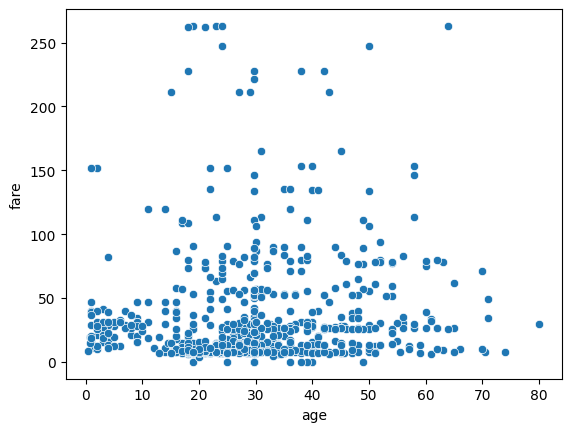

In [14]:
sns.scatterplot(data=df[df['fare']< 300], x='age', y='fare')

In [98]:
df =df[(df['age']>10) & (df['age']<45)]

<Axes: ylabel='age'>

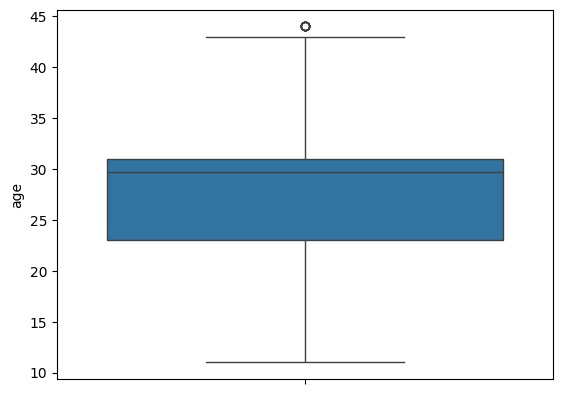

In [99]:
sns.boxplot(df, y='age')

In [100]:
df = df[(df['fare']>10) & (df['fare']<100)]

<Axes: ylabel='fare'>

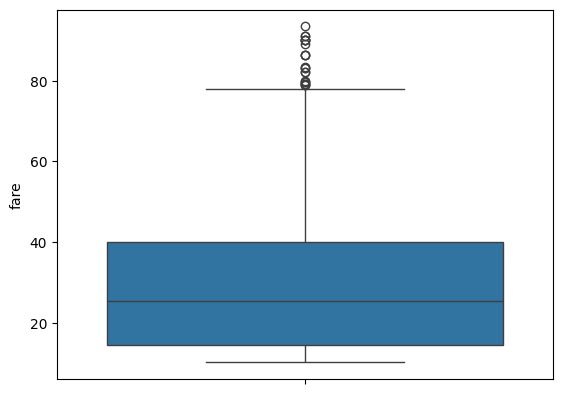

In [102]:
sns.boxplot(df, y='fare')

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression

In [116]:
X = df[['age', 'pclass']]
y = df['fare']

In [117]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [118]:
model = LinearRegression()


In [119]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [121]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('mae:', mean_absolute_error(y_test, y_pred))
print('mse:', mean_squared_error(y_test, y_pred))
print('r2:', r2_score(y_test, y_pred))

mae: 16.272353152965724
mse: 366.7629245719884
r2: 0.18681569565874256


In [179]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn import tree

In [159]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [160]:
X = df[['pclass', 'sex', 'age', 'fare', 'sibsp', 'parch']]
y = df['survived']

In [161]:
X = pd.get_dummies(X, columns=['sex'])

In [162]:
X.isnull().sum()

pclass          0
age           177
fare            0
sibsp           0
parch           0
sex_female      0
sex_male        0
dtype: int64

In [168]:
X['age'].fillna(value=X['age'].mean(), inplace=True)

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [182]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [181]:
print('accuracy_score:', accuracy_score(y_test, y_pred))
print('precsion_score:', precision_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))

accuracy_score: 0.7932960893854749
precsion_score: 0.7916666666666666
recall_score: 0.7215189873417721
f1_score: 0.7549668874172185


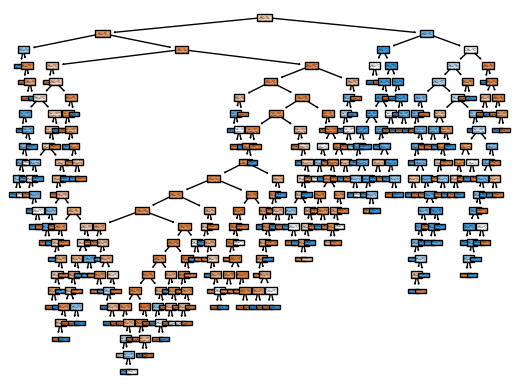

<Figure size 640x480 with 0 Axes>

In [175]:
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
plt.savefig('tree.png')

In [1]:
plt.figure(figsize=(20,10))
tree.plot_tree(model.fit(X,y), filled=True)
plt.show()
plt.savefig('tree.pdf', format='pdf', dpi=300)

NameError: name 'plt' is not defined

# KNN

In [183]:
from sklearn.neighbors import KNeighborsClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [184]:
print('accuracy_score:', accuracy_score(y_test, y_pred))
print('precsion_score:', precision_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))

accuracy_score: 0.7932960893854749
precsion_score: 0.7916666666666666
recall_score: 0.7215189873417721
f1_score: 0.7549668874172185


# Random forest

In [186]:
from sklearn.ensemble import RandomForestClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [188]:
print('accuracy_score:', accuracy_score(y_test, y_pred))
print('precsion_score:', precision_score(y_test, y_pred))
print('recall_score:', recall_score(y_test, y_pred))
print('f1_score:', f1_score(y_test, y_pred))

accuracy_score: 0.7988826815642458
precsion_score: 0.8028169014084507
recall_score: 0.7215189873417721
f1_score: 0.76
